- Download data at
- Insert path data as `data_path = /scratch2/data/4Real/709_raw/out/`
- Rename folders tr10, tr2, tr5, tr20, tr50, tr100 as tr10-1, tr2-1....
- Insery a path for saving the data
- Run everything

In [1]:
import linecache
import gzip
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# path of raw data
data_path = '/scratch/tdonauer/tabea_mt/data/709_long_raw/'

 # will save the data here
save_path =  '/scratch/tdonauer/tabea_mt/data'
folder_name = '709_long'  


# Save out (ground truth) WD

In [3]:
save_path = os.path.join(save_path, folder_name)
if not os.path.exists(save_path):
    os.mkdir(save_path) 

In [4]:
# Timesteps
t = np.arange(0, 18001, 300)

In [ ]:
for folder in os.listdir(data_path):    
#for folder in ["tr100-1"]:
    print(folder)
    for strin in os.listdir(data_path + folder + "/Results"):
        if (strin.endswith('.gz') or strin.endswith('.asc')):
            if ((strin.split('_')[3] == 'WDraster') & ('PEAK' not in strin)):       # do not add the PEAK values
                if int(strin.split('_')[-1].split('.')[0]) in t:                     # only select timesteps in t
                    #folder_path = folder.split('-')[0] + '_' + folder.split('-')[1]     # all this mess is to stay consistent with the chosen names of the folders
                    folder_path = folder
                    if not os.path.exists(os.path.join(save_path,folder_path)): 
                        os.mkdir(os.path.join(save_path,folder_path))       
                    save_name = strin.split('.')[0] + '.npy'
                    save_name = os.path.join(save_path, folder_path, save_name)

                    path_WD = os.path.join(data_path, folder, "Results", strin)
                    WD = np.loadtxt(path_WD, skiprows=6)                    
                    np.save(save_name, WD)
                    
    # add a zeros only WD for the first timesteps
    npy_zeros = np.zeros([WD.shape[0], WD.shape[1]])
    save_name_zeros = strin.split('_')[0] + '_' + strin.split('_')[1] + '_' + strin.split('_')[2] + '_' + '0'+ '.npy'
    save_name_zeros = os.path.join(save_path, folder_path, save_name_zeros)
    np.save(save_name_zeros, npy_zeros)

### Example visualization DEM file 

In [25]:
data_path = '/scratch/tdonauer/tabea_mt/data/datasets/'
ascii_grid = np.loadtxt(data_path + "709_dem_asc.asc", skiprows=6)

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

In [14]:
ascii_info = []    
[ascii_info.append((linecache.getline(data_path + "709_dem_asc.asc", i)).replace('\n' ,'')) for i in np.arange(7)]
ascii_info

['',
 'ncols        3000',
 'nrows        2525',
 'xllcorner    2682578.500000000000',
 'yllcorner    1246792.000000000000',
 'cellsize     1.000000000000',
 'NODATA_value  -9999.0']

In [ ]:
ascii_grid[ascii_grid==-9999.]=np.nan
np.nan_to_num(ascii_grid,copy=False)  
plt.imshow(ascii_grid)
plt.colorbar()
plt.show()

In [5]:
pred_path = "/scratch/tdonauer/tabea_mt/experiments/20220803-exp_lead6-709_new/20220803-709_new-simvp-6-False-False-True-convlstm-3/test-709_new/real1_c1/pred_event.npy"
save_path = "/scratch/tdonauer/tabea_mt/plots/20220803-exp_lead6-709_new/simvp30-3-visu"

In [6]:
def write_asc(timestep, save_path):
    pred = np.load(pred_path)
    pred_ts=pred[timestep,:]
    path = save_path + str(timestep) + ".asc"
    np.savetxt(path, pred_ts, fmt='%.5f',)
    f = open(path, 'r')
    text = f.read()
    f.close()
    f=open(path, 'w')
    print('open')
    f.write("ncols " + "3000" + "\n")
    f.write("nrows " + "2525" + "\n")
    f.write("xllcorner " + "2682578.500000000000" + "\n")
    f.write("yllcorner " + "1246792.000000000000" + "\n")
    f.write("cellsize " + str(1) + "\n")
    f.write("NODATA_value " + str(-9999) + "\n")
    f.write(text)
    f.close()
for i in [0,5,10,15,20,25,30]:
    write_asc(i, save_path)

"""
ascii_grid = np.loadtxt((save_path + str(20) + ".asc"), skiprows=6)
ascii_grid[ascii_grid==-9999.]=np.nan
np.nan_to_num(ascii_grid,copy=False)  
plt.imshow(ascii_grid)
plt.colorbar()
plt.show()
"""

open
open
open
open
open
open
open


'\nascii_grid = np.loadtxt((save_path + str(20) + ".asc"), skiprows=6)\nascii_grid[ascii_grid==-9999.]=np.nan\nnp.nan_to_num(ascii_grid,copy=False)  \nplt.imshow(ascii_grid)\nplt.colorbar()\nplt.show()\n'

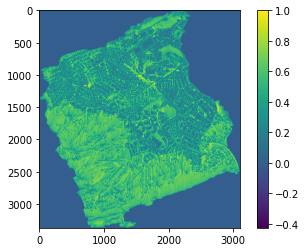

In [4]:
import rasterio
from sklearn import preprocessing

topo_index_path = '/scratch/tdonauer/tabea_mt/data/Luzern/Luzern_topographic_index.tif'
src = rasterio.open(topo_index_path)

# overwrite nan area with zeros
topo_index=np.nan_to_num(src.read(), copy=False)

# compute cuberoot and normalize with max value
topo_index=np.cbrt(topo_index[0]) 
topo_index=topo_index/topo_index.max()

# save file
np.save('/scratch/tdonauer/tabea_mt/data/Luzern/topo_index.npy', topo_index)
plt.imshow(topo_index)
plt.colorbar()


In [17]:
import numpy as np
import torch

path_topo_index = '/scratch/tdonauer/tabea_mt/data/709/topo_index.npy'
topo_index=np.load(path_topo_index)
torch.as_tensor(topo_index).shape
ascii_grid.shape

(2525, 3000)